<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span><ul class="toc-item"><li><span><a href="#QC-Thresholds" data-toc-modified-id="QC-Thresholds-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>QC Thresholds</a></span></li><li><span><a href="#Inputs" data-toc-modified-id="Inputs-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Inputs</a></span></li><li><span><a href="#Load-expression-data" data-toc-modified-id="Load-expression-data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Load expression data</a></span></li><li><span><a href="#Load-QC-data" data-toc-modified-id="Load-QC-data-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Load QC data</a></span></li><li><span><a href="#Load-metadata" data-toc-modified-id="Load-metadata-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Load metadata</a></span></li><li><span><a href="#Remove-extra-sample-rows" data-toc-modified-id="Remove-extra-sample-rows-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Remove extra sample rows</a></span></li></ul></li><li><span><a href="#Check-statistics" data-toc-modified-id="Check-statistics-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Check statistics</a></span><ul class="toc-item"><li><span><a href="#FastQC-stats" data-toc-modified-id="FastQC-stats-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>FastQC stats</a></span></li><li><span><a href="#Percent-of-reads-aligned-to-genome" data-toc-modified-id="Percent-of-reads-aligned-to-genome-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Percent of reads aligned to genome</a></span></li><li><span><a href="#Number-of-aligned-reads" data-toc-modified-id="Number-of-aligned-reads-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Number of aligned reads</a></span></li></ul></li><li><span><a href="#Examine-Global-Correlations" data-toc-modified-id="Examine-Global-Correlations-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Examine Global Correlations</a></span><ul class="toc-item"><li><span><a href="#Hierarchical-Clustering" data-toc-modified-id="Hierarchical-Clustering-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Hierarchical Clustering</a></span></li></ul></li><li><span><a href="#Remove-failed-samples" data-toc-modified-id="Remove-failed-samples-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Remove failed samples</a></span></li><li><span><a href="#Metadata-Curation" data-toc-modified-id="Metadata-Curation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Metadata Curation</a></span><ul class="toc-item"><li><span><a href="#BioProject-counts-of-passing-metadata" data-toc-modified-id="BioProject-counts-of-passing-metadata-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>BioProject counts of passing metadata</a></span></li><li><span><a href="#BioProject-counts-of-all-metadata" data-toc-modified-id="BioProject-counts-of-all-metadata-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>BioProject counts of all metadata</a></span></li></ul></li><li><span><a href="#Correlations-between-replicates" data-toc-modified-id="Correlations-between-replicates-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Correlations between replicates</a></span><ul class="toc-item"><li><span><a href="#Compute-Pearson-R-Score" data-toc-modified-id="Compute-Pearson-R-Score-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Compute Pearson R Score</a></span></li><li><span><a href="#Drop-Samples-with-no-replicates" data-toc-modified-id="Drop-Samples-with-no-replicates-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Drop Samples with no replicates</a></span></li></ul></li><li><span><a href="#Remove-failed-samples" data-toc-modified-id="Remove-failed-samples-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Remove failed samples</a></span></li><li><span><a href="#Save-final-datasets" data-toc-modified-id="Save-final-datasets-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Save final datasets</a></span></li></ul></div>

<font size="4">This is a template notebook for performing preliminary quality control on your organism's expression data.</font>

In [1]:
import pandas as pd
import os
from os import path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
sns.set_style('ticks')

# Setup

## QC Thresholds

In [3]:
min_pct_aligned = 40 # Minimum percent of reads aligned to genome
min_mrna_reads = 5e5 # Minimum number of reads mapped to mRNA

## Inputs

<font size="4">Enter organism name here</font>

In [4]:
organism = "Mycobacterium_tuberculosis"

<font size="4">Show files in the organism directory</font>

In [5]:
org_dir = path.join('../data')
os.listdir(org_dir)

['Mycobacterium_tuberculosis_H37Rv_2020-08-20.tsv',
 'multiqc_stats.tsv',
 'metadata_final.csv',
 'metadata.csv',
 'log_tpm_final.csv',
 'metadata_qc.csv',
 'counts.csv',
 'log_tpm_norm.csv',
 'multiqc_report.html',
 'log_tpm_qc.csv',
 'ica_runs',
 'multiqc_stats_qc.csv',
 'log_tpm.csv']

<font size="4">Enter name of curated metadata file here</font>

In [6]:
metadata_file = "metadata_qc.csv"

## Load expression data

In [7]:
DF_log_tpm = pd.read_csv(path.join(org_dir,'log_tpm_qc.csv'),index_col=0).fillna(0)
#DF_log_tpm = pd.read_csv('log_tpm.csv',index_col=0)
print('Number of genes:',DF_log_tpm.shape[0])
print('Number of samples:',DF_log_tpm.shape[1])

Number of genes: 3906
Number of samples: 930


In [8]:
DF_log_tpm.fillna(0,inplace=True)
DF_log_tpm.head()

,SRX6853284,SRX4314286,SRX3103184,SRX4505482,SRX5605054,SRX1559980,SRX4314321,SRX5388955,SRX5352231,ERX1941447,...,SRX3103186,SRX4647147,SRX5089864,SRX2923402,SRX7119389,SRX727250,ERX237506,SRX4647115,SRX4314337,SRX2382215
Geneid,,,,,,,,,,,,,,,,,,,,,
Rv0001,8.994006,8.707245,10.685787,9.912391,7.987324,8.348622,8.001994,8.778456,4.453788,10.359899,...,10.556713,9.088863,8.684468,3.984010,7.653258,8.565802,6.524831,8.837354,9.110614,8.764867
Rv0002,7.775441,7.830179,8.128876,9.147023,7.691317,7.814936,7.932471,8.297259,5.604562,6.901830,...,7.764804,8.268308,7.036904,3.989094,7.046294,7.695797,5.925088,8.137501,6.925339,8.126507
Rv0003,7.839234,7.859366,7.515985,7.919207,8.010417,7.096798,8.353467,6.412903,4.447555,6.389595,...,7.098281,7.734759,6.045134,3.770260,6.766871,6.911359,6.965905,8.046856,6.462680,7.606851
Rv0004,7.412712,7.441561,6.814170,7.354555,7.442190,6.607744,7.021447,6.813841,4.310161,6.974214,...,6.876050,7.655245,6.450298,5.265257,6.032581,7.373340,5.671482,7.547472,6.177277,7.555218
Rv0005,9.823104,9.583111,10.306363,10.304470,10.096693,9.458724,9.029269,9.795996,11.156536,10.079669,...,10.283263,10.234249,9.678509,10.334197,9.047204,10.252304,7.712434,10.333045,9.679296,8.827430


## Load QC data
<font size="4">There may be some datasets that failed along the processing pipeline, so the number of samples with QC data may be higher than the number of samples with expression data.</font>

In [9]:
DF_qc_stats = pd.read_csv(path.join(org_dir,'multiqc_stats_qc.csv'),index_col=0)
print('Number of samples with QC data:',DF_qc_stats.shape[0])

Number of samples with QC data: 930


In [10]:
DF_qc_stats.fillna(0,inplace=True)
DF_qc_stats.head()

,Total,Assigned,Unassigned_rRNA,Unassigned_Unmapped,Unassigned_Read_Type,Unassigned_Singleton,Unassigned_MappingQuality,Unassigned_Chimera,Unassigned_FragmentLength,Unassigned_Duplicate,...,r_written,bp_processed,quality_trimmed,bp_written,percent_trimmed,se_sense,se_antisense,failed,pe_sense,pe_antisense
SRX6853284,11767267,7922876,46536,724345,0,0,0,0,262444,0,...,11773251,1777760901,859407,1768461930,0.523072,0.0000,0.0000,0.4934,0.0770,0.4296
SRX4314286,1214192,774608,44587,269156,0,0,0,0,7675,0,...,1232282,92456539,1573522,90717803,1.880598,0.0000,0.0000,0.4745,0.1825,0.3430
SRX3103184,15897398,9489196,305398,762225,0,0,0,0,0,0,...,16024938,817271838,7817383,796648392,2.523450,0.4677,0.1161,0.4162,0.0000,0.0000
SRX4505482,13246720,10003174,245131,474348,0,0,0,0,0,0,...,13303878,997790850,4033409,984451793,1.336859,0.2658,0.2555,0.4788,0.0000,0.0000
SRX5605054,4692642,171708,8920,4365593,0,0,0,0,1401,0,...,4829616,437616668,3623660,415589228,5.033501,0.0000,0.0000,0.5871,0.0608,0.3521


## Load metadata

In [11]:
DF_metadata = pd.read_csv(path.join(org_dir,metadata_file),index_col=0)
print('Number of samples with metadata:',DF_metadata.shape[0])
DF_metadata.head()

Number of samples with metadata: 940


,ReleaseDate,TaxID,ScientificName,species_tax_id,class_tax_id,strain_tax_id,species,LibraryLayout,Platform,Model,...,GEO Series,GEO Sample,PMID,biosample_strain,biosample_genotype,R1,R2,project_name,condition_name,reference_condition
Experiment,,,,,,,,,,,,,,,,,,,,,
SRX6853284,2019-11-12 06:39:40,83332,Mycobacterium tuberculosis H37Rv,1773,1760,83332,Mycobacterium tuberculosis,PAIRED,ILLUMINA,Illumina NovaSeq 6000,...,NaN,NaN,NaN,H37Rv,NaN,NaN,NaN,mcr11,wt,wt
SRX4314286,2019-03-04 15:47:06,83332,Mycobacterium tuberculosis H37Rv,1773,1760,83332,Mycobacterium tuberculosis,PAIRED,ILLUMINA,NextSeq 500,...,GSE116353,GSM3229741,30833303.0,H37Rv,wildtype,NaN,NaN,hypoxia,045h_.03_DO,000h_.81_DO
SRX3103184,2018-02-28 16:53:06,1773,Mycobacterium tuberculosis,1773,1760,1773,Mycobacterium tuberculosis,SINGLE,ILLUMINA,Illumina HiSeq 2000,...,GSE102816,GSM2746765,29378893.0,NaN,NaN,NaN,NaN,cnpB,wt,wt
SRX4505482,2018-09-25 17:57:13,1773,Mycobacterium tuberculosis,1773,1760,1773,Mycobacterium tuberculosis,SINGLE,ILLUMINA,NextSeq 500,...,GSE118084,GSM3318407,31719182.0,NaN,NaN,NaN,NaN,emb,0_days_2.45,0_days_control
SRX5605054,2019-03-30 08:19:12,83332,Mycobacterium tuberculosis H37Rv,1773,1760,83332,Mycobacterium tuberculosis,PAIRED,ILLUMINA,Illumina HiSeq 2500,...,NaN,NaN,NaN,H37Rv,NaN,NaN,NaN,resus,day_7_run_2,day_1_run_1


## Remove extra sample rows

In [12]:
# Ensure that metadata and qc_stats data contain all log_tpm sample information
assert(set(DF_log_tpm.columns) - set(DF_metadata.index) == set())
assert(set(DF_log_tpm.columns) - set(DF_qc_stats.index) == set())

In [13]:
DF_metadata = DF_metadata.loc[DF_log_tpm.columns]
DF_qc_stats = DF_qc_stats.loc[DF_log_tpm.columns]

# Check statistics

<font size="4">From here, create a new spreadsheet where you can flag samples based on various QC statistics</font>


## FastQC stats

In [14]:
fastqc_cols = ['per_base_sequence_quality',
       'per_sequence_quality_scores',
       'per_base_sequence_content', 'per_sequence_gc_content',
       'per_base_n_content', 'sequence_length_distribution',
       'sequence_duplication_levels', 'overrepresented_sequences',
       'adapter_content']

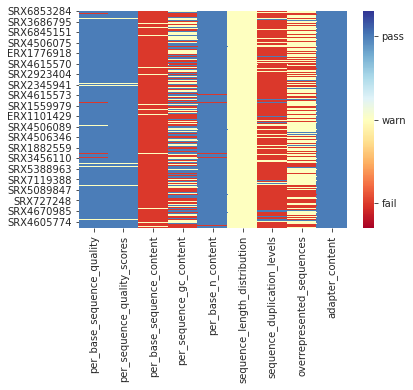

In [15]:
DF_fastqc = DF_qc_stats[fastqc_cols]
ax = sns.heatmap(DF_fastqc.replace('pass',1).replace('warn',0).replace('fail',-1),
            cmap='RdYlBu',vmax=1.3,vmin=-1.3)
cbar = ax.collections[0].colorbar
cbar.set_ticks([-1,0,1])
cbar.set_ticklabels(['fail','warn','pass'])

<font size="4">The following four categories are the most important:
    - per_base_sequence_quality
    - per_sequence_quality_scores
    - per_base_n_content
    - adapter_content
    
If a sample does not pass any of these four categories, discard the sample
</font>

In [16]:
fastqc_fail_cols = ['per_base_sequence_quality',
                    'per_sequence_quality_scores',
                    'per_base_n_content',
                    'adapter_content']

In [17]:
DF_failed_fastqc = DF_fastqc[fastqc_fail_cols][(DF_fastqc[fastqc_fail_cols] != 'pass').any(axis=1)]
DF_failed_fastqc[fastqc_fail_cols]

,per_base_sequence_quality,per_sequence_quality_scores,per_base_n_content,adapter_content
ERX1941447,warn,pass,pass,pass
SRX5605050,fail,pass,pass,pass
ERX1776920,pass,warn,pass,pass
SRX1073782,warn,warn,pass,pass
ERX1776919,pass,warn,pass,pass
ERX1776918,pass,warn,pass,pass
ERX2161009,pass,pass,fail,pass
SRX976715,warn,warn,pass,pass
SRX976787,warn,warn,pass,pass
SRX1073781,warn,warn,pass,pass


<font size="4">Mark samples as failed.</font>

In [18]:
DF_metadata['passed_fastqc'] = ~DF_metadata.index.isin(DF_failed_fastqc.index)

## Percent of reads aligned to genome

In [19]:
#min_pct_aligned

In [20]:
#percent_alignment = DF_qc_stats["reads_aligned_percentage"]
#percent_alignment

In [21]:
"""fig,ax = plt.subplots()
ax.hist(percent_alignment,bins=50,alpha=0.8)
ymin,ymax = ax.get_ylim()
ax.vlines(min_pct_aligned,ymin,ymax,color='r')
ax.set_ylim((ymin,ymax))
ax.set_xlabel('% of reads mapped to genome',fontsize=14)
ax.set_ylabel('# Samples',fontsize=14)
ax.set_title('Histogram of Alignment Percentage',fontsize=16)"""

"fig,ax = plt.subplots()\nax.hist(percent_alignment,bins=50,alpha=0.8)\nymin,ymax = ax.get_ylim()\nax.vlines(min_pct_aligned,ymin,ymax,color='r')\nax.set_ylim((ymin,ymax))\nax.set_xlabel('% of reads mapped to genome',fontsize=14)\nax.set_ylabel('# Samples',fontsize=14)\nax.set_title('Histogram of Alignment Percentage',fontsize=16)"

In [22]:
#DF_failed_mapping = DF_qc_stats[percent_alignment < min_pct_aligned]
#DF_failed_mapping

In [23]:
#DF_metadata['passed_pct_reads_mapped'] = ~DF_metadata.index.isin(DF_failed_mapping.index)

## Number of aligned reads

<font size="4">The following histogram shows how many reads map to coding sequences (i.e. mRNA). Too few aligned reads reduces the sensitivity of the resulting data.</font>

In [24]:
min_mrna_reads

500000.0

Text(0.5, 1.0, 'Number of reads mapped to CDS')

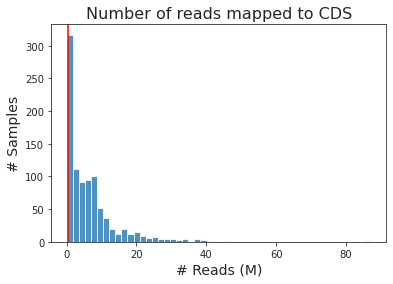

In [25]:
fig,ax = plt.subplots()
ax.hist(DF_qc_stats['Assigned']/1e6,bins=50,alpha=0.8)
ymin,ymax = ax.get_ylim()
ax.vlines(min_mrna_reads/1e6,ymin,ymax,color='r')
ax.set_ylim((ymin,ymax))
ax.set_xlabel('# Reads (M)',fontsize=14)
ax.set_ylabel('# Samples',fontsize=14)
ax.set_title('Number of reads mapped to CDS',fontsize=16)

<font size="4">Identify samples with poor read depth:</font>

In [58]:
DF_failed_mrna = DF_qc_stats[DF_qc_stats['Assigned'] < min_mrna_reads].sort_values('Assigned')
for i in DF_failed_mrna.index:
    print(i)

ERX3390648
ERX1776917
ERX3390649
ERX1776916
ERX1776922
SRX3243874
SRX3686803
SRX3686802
SRX3243879
SRX4615575
ERX1776918
SRX3456116
SRX3243865
SRX3456115
SRX4615573
SRX3456114
ERX1776928
SRX3243877
SRX976711
SRX976715
SRX3243878
SRX7815936
SRX7815934
SRX894002
ERX1776925
SRX976574
SRX976787
SRX2382018
SRX4624197
SRX5605053
SRX3456133
SRX3456134
SRX5112243
SRX5112242
SRX5112244
SRX976569
SRX894003
SRX5112245
SRX976718
SRX3456132
SRX5605046
SRX5605057
SRX7815937
ERX1776927
ERX1776921
ERX1818328
SRX976790
SRX7815935
SRX302123
SRX976328
ERX1818329
SRX4624195
SRX3243868
SRX3243875
SRX3243870
ERX1776923
SRX3243871
SRX3243864
SRX976793
SRX976712
ERX1776926
SRX976791
SRX3243869
SRX3243873
SRX3243880
SRX976789
SRX4615574
SRX5605054
SRX5605043
SRX5605058
ERX1818327
SRX3243881
SRX3243872
SRX3243876
SRX3456111
ERX1941448
SRX3243866
SRX4647118
SRX4314270
SRX5605052
SRX3243867
SRX3456112
SRX3456113
SRX894001
SRX3243863
SRX3456121
SRX302122
SRX3456131
ERX1776924
SRX3456129
ERX1818316
SRX6720465
SRX34

<font size="4">Mark samples as failed.</font>

In [27]:
DF_metadata['passed_reads_mapped_to_CDS'] = ~DF_metadata.index.isin(DF_failed_mrna.index)

# Examine Global Correlations

## Hierarchical Clustering

<font size=4> A clustermap is a great way to visualize the global correlations between one sample and all others. The following code uses hierarchical clustering to identify specific clusters in the clustermap <font size=4>
    
<font size=4> To increase the number of clusters, decrease the value of `thresh`. To decrease the number of clusters, increase the value of `thresh` <font size=4>

In [28]:
import scipy.cluster.hierarchy as sch
import matplotlib.patches as patches
# change this to get different number of clusters
thresh = .27

# retrieve clusters using fcluster 
corr = DF_log_tpm.corr()
corr.fillna(0,inplace=True)
dist = sch.distance.pdist(corr)
link = sch.linkage(dist, method='complete')
clst = pd.DataFrame(index=DF_log_tpm.columns)
clst['cluster'] = sch.fcluster(link, thresh * dist.max(), 'distance')

#get colors for each cluster
cm = plt.cm.get_cmap('tab20')
clr = dict(zip(clst.cluster.unique(), cm.colors))
clst['color'] = clst.cluster.map(clr)

print('Number of cluster: ', len(clr))

Number of cluster:  7


<font size="4">To view sample IDs in the clustermap, set `xticklabels` and `yticklabels` to `True`. You can increase the `size` variable to improve readability of sample IDs<font>

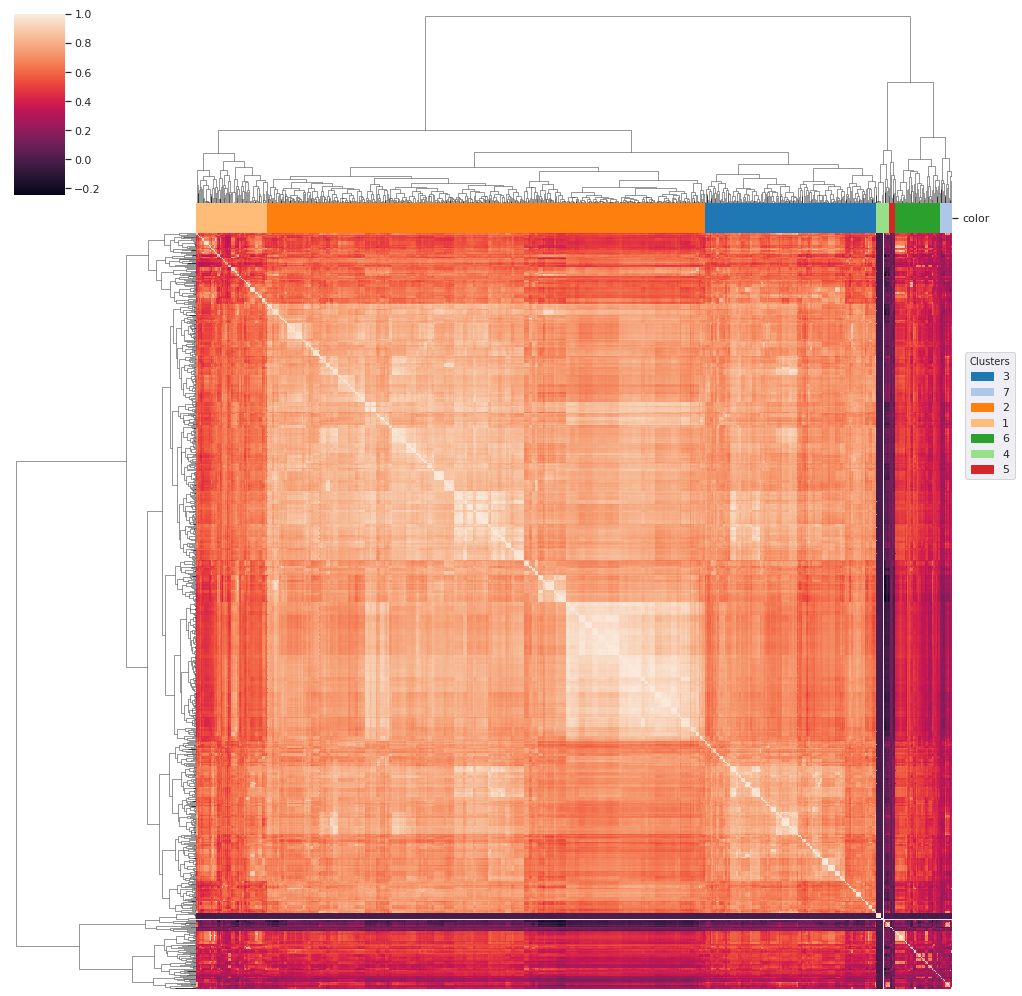

In [29]:
size = 14

legend_TN = [patches.Patch(color=c, label=l) for l,c in clr.items()]

sns.set(rc={'figure.facecolor':'white'})
g = sns.clustermap(DF_log_tpm.corr(), figsize=(size,size), 
                   row_linkage=link, col_linkage=link, col_colors=clst.color,
                  yticklabels=False, xticklabels=False)

l2=g.ax_heatmap.legend(loc='upper left', bbox_to_anchor=(1.01,0.85), handles=legend_TN,frameon=True)
l2.set_title(title='Clusters',prop={'size':10})

<font size="4">Select clusters to remove.</font>

In [57]:
#indicate which clusters you want to remove
remove_clst = [4,5]
failed_global_corr = clst[clst.cluster.isin(remove_clst)].index
failed_global_corr

Index(['SRX2382221', 'SRX6720467', 'SRX6720464', 'SRX4314324', 'SRX3243874',
       'SRX2382223', 'SRX6720469', 'ERX3390648', 'SRX6720468', 'SRX4670987',
       'SRX4314326', 'SRX4314313', 'SRX4314325', 'ERX1776916', 'SRX6720466',
       'SRX4314322', 'SRX4314323', 'SRX6720465', 'SRX3243879', 'ERX1776917',
       'SRX4670986', 'ERX1776922', 'ERX3390649'],
      dtype='object')

In [31]:
DF_metadata['passed_global_correlation'] = ~DF_metadata.index.isin(failed_global_corr)

In [32]:
DF_metadata.head()

,ReleaseDate,TaxID,ScientificName,species_tax_id,class_tax_id,strain_tax_id,species,LibraryLayout,Platform,Model,...,biosample_strain,biosample_genotype,R1,R2,project_name,condition_name,reference_condition,passed_fastqc,passed_reads_mapped_to_CDS,passed_global_correlation
SRX6853284,2019-11-12 06:39:40,83332,Mycobacterium tuberculosis H37Rv,1773,1760,83332,Mycobacterium tuberculosis,PAIRED,ILLUMINA,Illumina NovaSeq 6000,...,H37Rv,NaN,NaN,NaN,mcr11,wt,wt,True,True,True
SRX4314286,2019-03-04 15:47:06,83332,Mycobacterium tuberculosis H37Rv,1773,1760,83332,Mycobacterium tuberculosis,PAIRED,ILLUMINA,NextSeq 500,...,H37Rv,wildtype,NaN,NaN,hypoxia,045h_.03_DO,000h_.81_DO,True,True,True
SRX3103184,2018-02-28 16:53:06,1773,Mycobacterium tuberculosis,1773,1760,1773,Mycobacterium tuberculosis,SINGLE,ILLUMINA,Illumina HiSeq 2000,...,NaN,NaN,NaN,NaN,cnpB,wt,wt,True,True,True
SRX4505482,2018-09-25 17:57:13,1773,Mycobacterium tuberculosis,1773,1760,1773,Mycobacterium tuberculosis,SINGLE,ILLUMINA,NextSeq 500,...,NaN,NaN,NaN,NaN,emb,0_days_2.45,0_days_control,True,True,True
SRX5605054,2019-03-30 08:19:12,83332,Mycobacterium tuberculosis H37Rv,1773,1760,83332,Mycobacterium tuberculosis,PAIRED,ILLUMINA,Illumina HiSeq 2500,...,H37Rv,NaN,NaN,NaN,resus,day_7_run_2,day_1_run_1,True,False,True


# Remove failed samples

In [33]:
qc_columns = ['passed_fastqc',
              'passed_reads_mapped_to_CDS',
              'passed_global_correlation']

In [34]:
pass_qc = DF_metadata[qc_columns].all(axis=1)
DF_metadata_passed = DF_metadata[pass_qc]

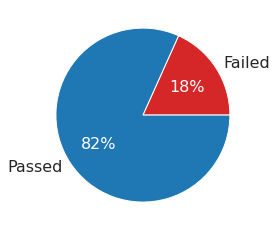

In [35]:
_,_,pcts = plt.pie(pass_qc.value_counts().sort_values(),
        labels = ['Failed','Passed'],
        colors=['tab:red','tab:blue'],
        autopct='%.0f%%',textprops={'size':16});

# Colors percents white
for pct in pcts:
    pct.set_color('white')

# Metadata Curation

<font size=4>The following sections can only be run after metadata curation is complete. To enable metadata curation, the code in this section sorts data by BioProject. </font>

## BioProject counts of passing metadata

In [36]:
DF_metadata_passed.project_name.value_counts().sort_values(ascending=False)

kinase            83
hypoxia           71
ITM_04            28
rho               25
mrsI              24
                  ..
orF                2
ITM_04_strain      1
benzothiophene     1
TA_system          1
fatty_acid         1
Name: project_name, Length: 67, dtype: int64

## BioProject counts of all metadata

In [37]:
DF_metadata.condition_name.value_counts().sort_values(ascending=False)

0_days_control    41
1_days_control    41
control           24
wt                20
treated           11
                  ..
06h_WT             1
MTB06-R2a          1
Sample1-A_R1       1
MTB08-sta          1
FA_NRP2            1
Name: condition_name, Length: 324, dtype: int64

# Correlations between replicates

<font size=4> First, get a full sample name </font>

In [38]:
# Turn off pesky warning
pd.set_option('mode.chained_assignment', None)

In [39]:
DF_metadata_passed['full_name'] = DF_metadata_passed.loc[:,'project_name'].str.cat(DF_metadata_passed.loc[:,'condition_name'],sep=':')

## Compute Pearson R Score

<font size="4">Once you have updated your metadata files with the sample information, we can investigate correlations between biological replicates. We require biological replicates to have a Pearson R correlation above 0.95. For samples with more than 2 replicates, the replicates must have R >= 0.95 with at least one other replicate or it will be dropped. </font>

In [40]:
from tqdm.notebook import tqdm
import itertools
from scipy import stats
import numpy as np

In [41]:
rep_corrs = {}
rand_corrs = {}

num_comparisons = len(DF_metadata_passed)*(len(DF_metadata_passed)-1)/2
for exp1,exp2 in tqdm(itertools.combinations(DF_metadata_passed.index,2),total=num_comparisons):
    if DF_metadata_passed.loc[exp1,'full_name'] == DF_metadata_passed.loc[exp2,'full_name']:
        rep_corrs[(exp1,exp2)] = stats.pearsonr(DF_log_tpm[exp1],DF_log_tpm[exp2])[0]
    else:
        rand_corrs[(exp1,exp2)] = stats.pearsonr(DF_log_tpm[exp1],DF_log_tpm[exp2])[0]

In [42]:
sns.set_style('ticks')

Median Pearson R between replicates: 0.99


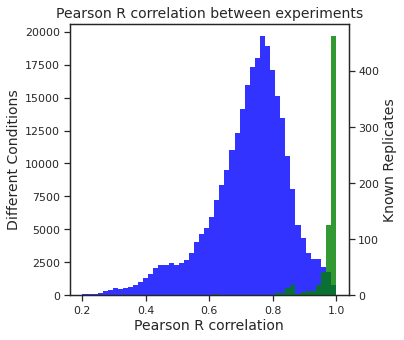

In [43]:
fig,ax = plt.subplots(figsize=(5,5))
ax2 = ax.twinx()
ax2.hist(rep_corrs.values(),bins=50,range=(0.2,1),alpha=0.8,color='green',linewidth=0)
ax.hist(rand_corrs.values(),bins=50,range=(0.2,1),alpha=0.8,color='blue',linewidth=0)
ax.set_title('Pearson R correlation between experiments',fontsize=14)
ax.set_xlabel('Pearson R correlation',fontsize=14)
ax.set_ylabel('Different Conditions',fontsize=14)
ax2.set_ylabel('Known Replicates',fontsize=14)

med_corr = np.median([v for k,v in rep_corrs.items()])
print('Median Pearson R between replicates: {:.2f}'.format(med_corr))

In [44]:
#pearson r cutoff for replicates
rcutoff = 0.85

#for each sample get max correlation between replicates
dissimilar = []
for idx, grp in DF_metadata_passed.groupby('full_name'):
    ident = np.identity(len(grp))
    corrs = (DF_log_tpm[grp.index].corr() - ident).max()
    dissimilar.extend(corrs[corrs<rcutoff].index)
DF_metadata['passed_replicate_corr'] = ~DF_metadata.index.isin(dissimilar)
DF_metadata_passed['passed_similar_replicates'] = ~DF_metadata_passed.index.isin(dissimilar)
dissimilar

['SRX5089843',
 'ERX1941445',
 'ERX1941446',
 'ERX1941449',
 'ERX1941438',
 'ERX1941437',
 'ERX1941436',
 'ERX1941439',
 'SRX4670985',
 'ERX1818315',
 'ERX1818323',
 'ERX1818308',
 'ERX1818310',
 'ERX1818311',
 'SRX3456108',
 'SRX581833',
 'SRX4647114',
 'SRX4647117',
 'SRX4647122',
 'SRX2481055',
 'SRX4624196',
 'SRX7358420',
 'SRX7358422',
 'SRX7358421',
 'SRX7358423',
 'SRX4314287',
 'SRX4314294',
 'SRX4314296',
 'SRX4314310',
 'SRX4314321',
 'SRX4314329',
 'SRX302120',
 'SRX302121',
 'SRX4319036',
 'SRX2345946',
 'SRX2345945',
 'SRX357086',
 'SRX357085',
 'SRX5509425',
 'SRX5509426',
 'SRX256583',
 'SRX256581',
 'SRX256582',
 'SRX212035',
 'SRX5605047',
 'SRX5605056',
 'SRX2382025',
 'SRX2382026',
 'SRX2382032',
 'SRX1559979',
 'SRX1559980',
 'SRX1559981',
 'SRX1559982',
 'SRX1559977',
 'SRX1559978',
 'ERX1101429',
 'ERX1101428',
 'SRX958327',
 'SRX4615571']

## Drop Samples with no replicates

In [45]:
cond_counts = DF_metadata_passed.condition_name.value_counts()
drop_conds = cond_counts[cond_counts < 2].index
drop_conds

Index(['dorm_run_1', '1A_strain', 'Solexa-63234', '00h_WT', '02_h_NO',
       '24h_THP_C_enriched', 'ctrl_C', '094h_0_DO', 'Sample2-E_R1_1', 'ctrl_A',
       'Sample1-E_R1_1', '1_days_32', 'wt_with_ATC', 'Solexa-63231', '06_DUC',
       '8A_strain_comp_14', 'tolox_ph_5.5', '24h_inf', '0_days_30',
       'adipocytes', 'dubos_stat', 'emb_4h', 'Solexa-63232',
       '1A_strain_comp_14', 'FA_NRP1', 'wt_no_ATC', 'wt_comp_14', 'Mtb_H37Rv',
       'Sample2-A_R1', '5um_btp15', 'XX_h_NO', 'Solexa-63233', 'dubos_exp',
       '06h_WT', 'ctrl_B', '00h_THP_A', 'day_2_run_1', 'Sample1-A_R1',
       '1_days_starve', '8A_strain'],
      dtype='object')

In [46]:
DF_metadata_passed['passed_number_replicates'] = ~DF_metadata_passed.condition_name.isin(drop_conds)

In [47]:
DF_metadata_passed = DF_metadata_passed[DF_metadata_passed['passed_number_replicates']]

In [48]:
DF_metadata_passed

,ReleaseDate,TaxID,ScientificName,species_tax_id,class_tax_id,strain_tax_id,species,LibraryLayout,Platform,Model,...,R2,project_name,condition_name,reference_condition,passed_fastqc,passed_reads_mapped_to_CDS,passed_global_correlation,full_name,passed_similar_replicates,passed_number_replicates
SRX6853284,2019-11-12 06:39:40,83332,Mycobacterium tuberculosis H37Rv,1773,1760,83332,Mycobacterium tuberculosis,PAIRED,ILLUMINA,Illumina NovaSeq 6000,...,NaN,mcr11,wt,wt,True,True,True,mcr11:wt,True,True
SRX4314286,2019-03-04 15:47:06,83332,Mycobacterium tuberculosis H37Rv,1773,1760,83332,Mycobacterium tuberculosis,PAIRED,ILLUMINA,NextSeq 500,...,NaN,hypoxia,045h_.03_DO,000h_.81_DO,True,True,True,hypoxia:045h_.03_DO,True,True
SRX3103184,2018-02-28 16:53:06,1773,Mycobacterium tuberculosis,1773,1760,1773,Mycobacterium tuberculosis,SINGLE,ILLUMINA,Illumina HiSeq 2000,...,NaN,cnpB,wt,wt,True,True,True,cnpB:wt,True,True
SRX4505482,2018-09-25 17:57:13,1773,Mycobacterium tuberculosis,1773,1760,1773,Mycobacterium tuberculosis,SINGLE,ILLUMINA,NextSeq 500,...,NaN,emb,0_days_2.45,0_days_control,True,True,True,emb:0_days_2.45,True,True
SRX5388955,2019-02-20 16:35:09,83332,Mycobacterium tuberculosis H37Rv,1773,1760,83332,Mycobacterium tuberculosis,SINGLE,ILLUMINA,NextSeq 500,...,NaN,JSF,DMSO,DMSO,True,True,True,JSF:DMSO,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRX7119389,2019-11-12 00:44:14,83332,Mycobacterium tuberculosis H37Rv,1773,1760,83332,Mycobacterium tuberculosis,PAIRED,ILLUMINA,Illumina NovaSeq 6000,...,NaN,miceNF,control,control,True,True,True,miceNF:control,True,True
SRX727250,2015-05-11 09:52:05,83332,Mycobacterium tuberculosis H37Rv,1773,1760,83332,Mycobacterium tuberculosis,PAIRED,ILLUMINA,Illumina MiSeq,...,NaN,tss,wt_experiment_2,wt_experiment_2,True,True,True,tss:wt_experiment_2,True,True
ERX237506,2013-12-02 14:20:50,83332,Mycobacterium tuberculosis H37Rv,1773,1760,83332,Mycobacterium tuberculosis,SINGLE,ILLUMINA,Illumina HiSeq 2000,...,NaN,growth,tss_expnt,wt_expn,True,True,True,growth:tss_expnt,True,True
SRX4314337,2019-03-04 15:47:08,83332,Mycobacterium tuberculosis H37Rv,1773,1760,83332,Mycobacterium tuberculosis,PAIRED,ILLUMINA,NextSeq 500,...,NaN,hypoxia,116h_.11_DO,000h_.81_DO,True,True,True,hypoxia:116h_.11_DO,True,True


# Remove failed samples

In [49]:
qc_columns = ['passed_number_replicates','passed_similar_replicates']

In [50]:
DF_metadata_final = DF_metadata_passed[DF_metadata_passed[qc_columns].all(axis=1)]

In [51]:
DF_metadata_final.shape

(701, 42)

In [52]:
DF_log_tpm_final = DF_log_tpm[DF_metadata_final.index]

In [53]:
DF_metadata_passed.project_name.value_counts().sort_values(ascending=False)

kinase           83
hypoxia          70
ITM_04           28
mrsI             24
rho              22
                 ..
thrB              3
THP-1             2
orF               2
ITM_04_strain     1
rv2887            1
Name: project_name, Length: 61, dtype: int64

In [54]:
for i,row in DF_metadata_final.sort_values(["project_name","condition_name"]).iterrows():
    print(i+" "+row["project_name"]+":"+row["condition_name"])

SRX3995807 AX:AX_10_MIC
SRX3995806 AX:AX_10_MIC
SRX3995809 AX:AX_30_MIC
SRX3995808 AX:AX_30_MIC
SRX4619048 AX:QZ_10_MIC
SRX4619047 AX:QZ_10_MIC
SRX4619049 AX:QZ_30_MIC
SRX4619050 AX:QZ_30_MIC
SRX3995804 AX:wt
SRX3995805 AX:wt
SRX8590644 DarG:high_ATC
SRX8590653 DarG:high_ATC
SRX8590645 DarG:high_ATC
SRX8590650 DarG:low_ATC
SRX8590652 DarG:low_ATC
SRX8590651 DarG:low_ATC
SRX5089845 ITM_04:00h_clinic_ctrl
SRX5089844 ITM_04:00h_clinic_ctrl
SRX5089860 ITM_04:00h_h37rv_control
SRX5089859 ITM_04:00h_h37rv_control
SRX5089858 ITM_04:00h_h37rv_control
SRX5089856 ITM_04:06h_clinic_DMSO
SRX5089855 ITM_04:06h_clinic_DMSO
SRX5089857 ITM_04:06h_clinic_DMSO
SRX5089854 ITM_04:06h_clinic_delam
SRX5089853 ITM_04:06h_clinic_delam
SRX5089852 ITM_04:06h_clinic_delam
SRX5089870 ITM_04:06h_h37rv_DMSO
SRX5089869 ITM_04:06h_h37rv_DMSO
SRX5089871 ITM_04:06h_h37rv_DMSO
SRX5089868 ITM_04:06h_h37rv_delam
SRX5089866 ITM_04:06h_h37rv_delam
SRX5089867 ITM_04:06h_h37rv_delam
SRX5089849 ITM_04:24h_clinic_DMSO
SRX508985

In [55]:
DF_metadata_final.shape

(701, 42)

# Save final datasets

In [56]:
#DF_log_tpm_final.to_csv(os.path.join(org_dir,'log_tpm_final.csv'))
#DF_metadata_final.to_csv(os.path.join(org_dir,'metadata_final.csv'))